In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib as mpl

data = pd.read_csv('vgsales.csv')

data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [40]:
#showing the missing data

data_select = data[["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
data_select.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [60]:
# Ensure the 'Year' column is numeric and drop invalid years
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year', 'Publisher'])

# Remove rows where any of the columns contain "Unknown" or "N/A"
data = data[~data.isin(["Unknown", "N/A"]).any(axis=1)]

# Remove rows where the year is 2020
data = data[data['Year'] != 2020]

#Remove rows where the year is 2019
data = data[data['Year'] != 2019]

#Remove rows where the year is 2018
data = data[data['Year'] != 2018]

#Remove rows where the year is 2017
data = data[data['Year'] != 2017]

# Select specific columns
data_select = data[["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

# # Check for any remaining null values
# print(data_select.isnull().sum())



In [61]:
genre_counts=data['Genre'].value_counts()
genre_counts

Action          3233
Sports          2297
Misc            1671
Role-Playing    1455
Shooter         1279
Adventure       1261
Racing          1222
Platform         870
Simulation       842
Fighting         835
Strategy         664
Puzzle           558
Name: Genre, dtype: int64

In [62]:
# count unique genres

newData = data['Genre'].str.split(', ')
unique_genres = newData.explode().str.strip().unique()
genre_counts = newData.explode().str.strip().value_counts()

print(unique_genres,genre_counts)

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy'] Action          3233
Sports          2297
Misc            1671
Role-Playing    1455
Shooter         1279
Adventure       1261
Racing          1222
Platform         870
Simulation       842
Fighting         835
Strategy         664
Puzzle           558
Name: Genre, dtype: int64


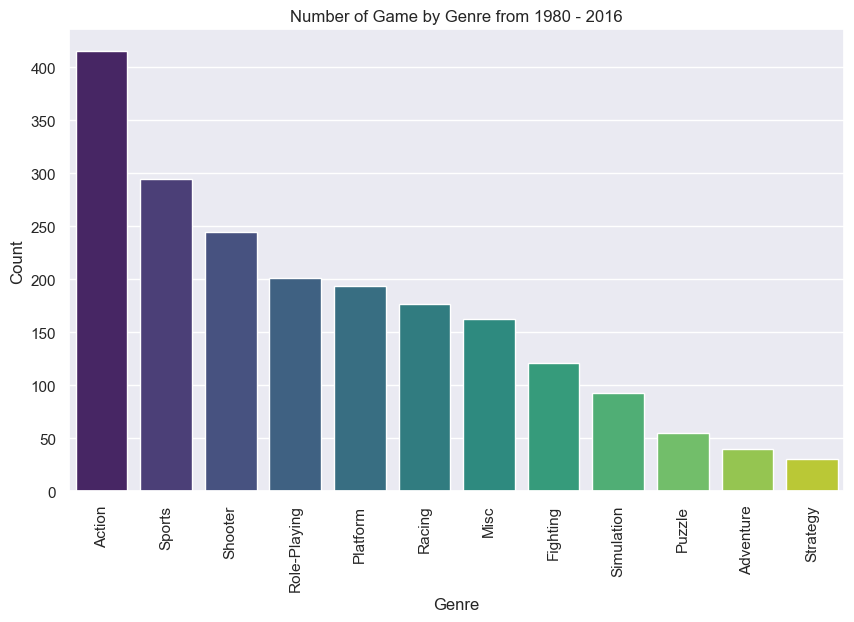

In [105]:
# create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Number of Game by Genre from 1980 - 2016")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

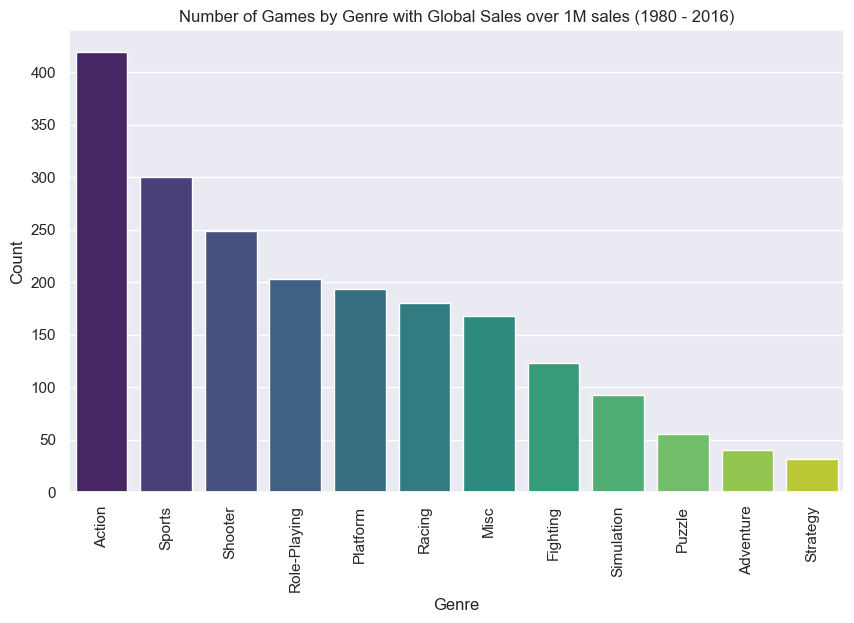

In [104]:
# Filter the data for Global_Sales >= 1.00
filtered_data = data[data['Global_Sales'] >= 1.00]

# Count the number of games by genre in the filtered dataset
genre_counts_filtered_1M = filtered_data['Genre'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts_filtered_1M.index, y=genre_counts_filtered_1M, palette="viridis")
plt.title("Number of Games by Genre with Global Sales over 1M sales (1980 - 2016)")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)



plt.show()

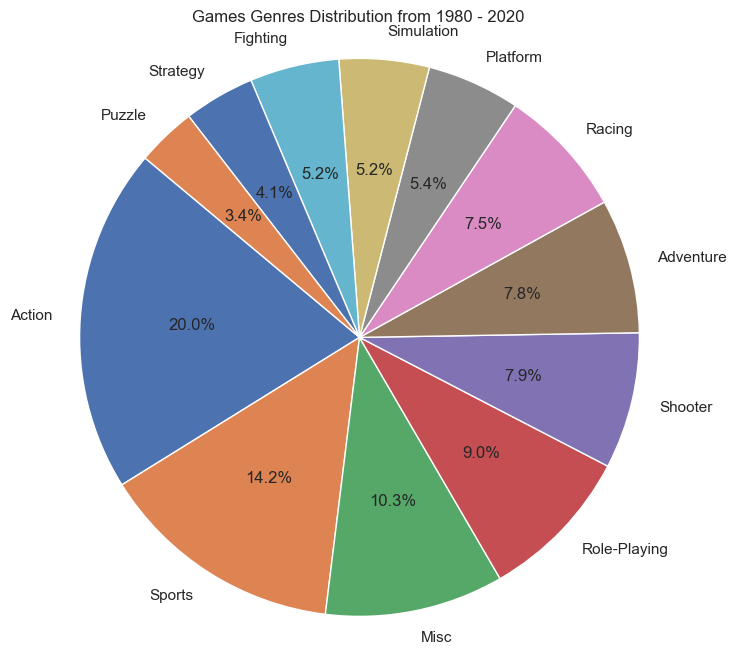

In [65]:
# create a pie chart
genre_data = data['Genre']
plt.figure(figsize=(8, 8))
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Games Genres Distribution from 1980 - 2020')
plt.axis('equal')

plt.show()

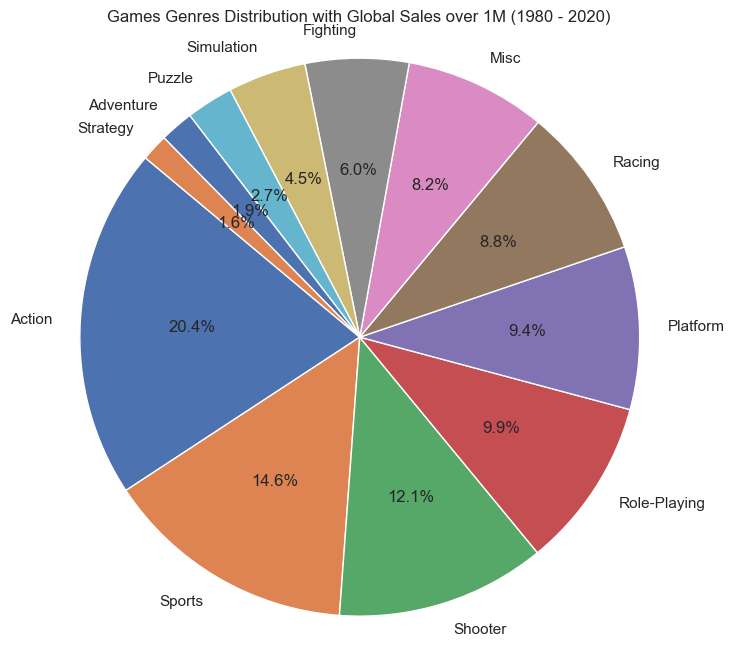

In [47]:
# create a pie chart which game over 1M
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts_filtered_1M.values, labels=genre_counts_filtered_1M.index, autopct='%1.1f%%', startangle=140)
plt.title('Games Genres Distribution with Global Sales over 1M (1980 - 2020)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.show()

C:\Users\antonleung\AppData\Local\Temp\ipykernel_13536\735786327.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_publishers = main_publishers.append(pd.Series({'Other': other_count}))


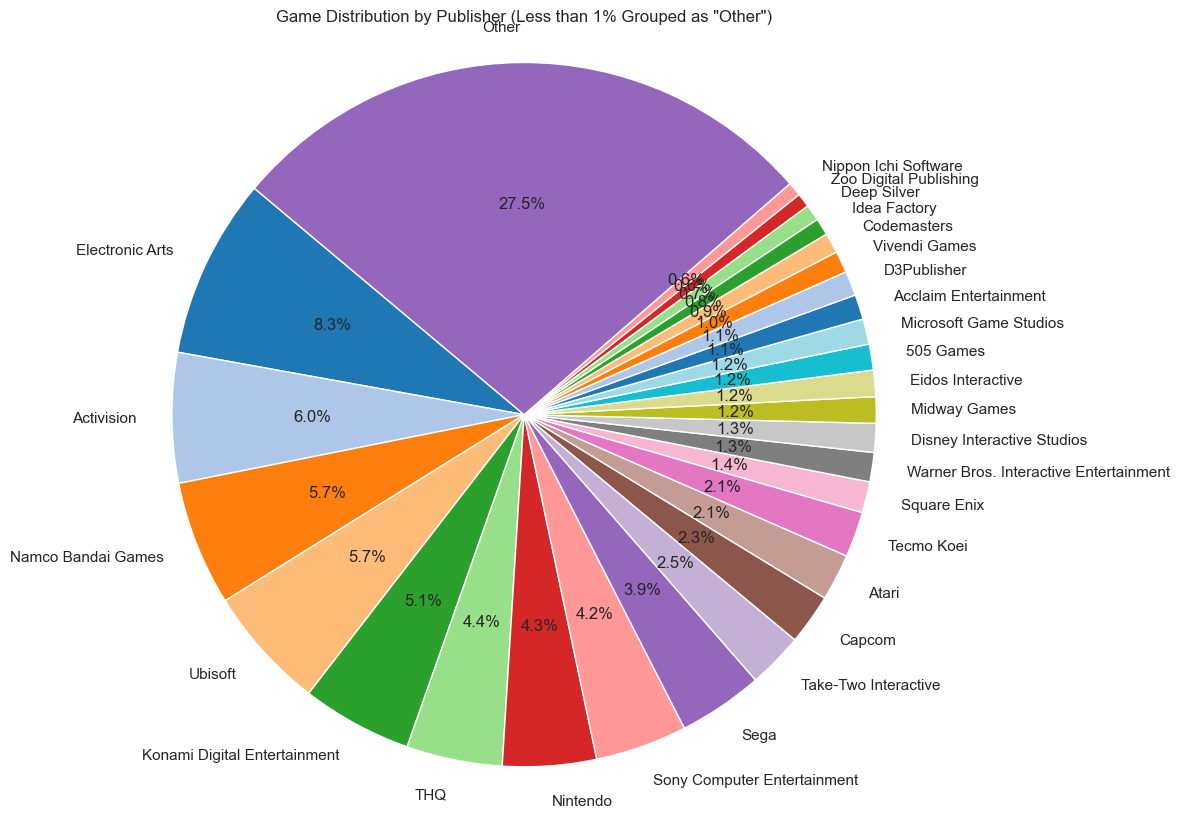

In [96]:
# Count the number of games by publisher
publisher_counts = data['Publisher'].value_counts()

# Calculate the total number of games
total_games = publisher_counts.sum()

# Separate publishers contributing less than 1% into an "Other" category
main_publishers = publisher_counts[publisher_counts / total_games >= 0.006]
other_count = publisher_counts[publisher_counts / total_games < 0.006].sum()

# Add the "Other" category
main_publishers = main_publishers.append(pd.Series({'Other': other_count}))

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    main_publishers.values,
    labels=main_publishers.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("tab20", len(main_publishers))
)
plt.title('Game Distribution by Publisher (Less than 1% Grouped as "Other")')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.show()




C:\Users\antonleung\AppData\Local\Temp\ipykernel_13536\4259757416.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_publishers = main_publishers.append(pd.Series({'Other': other_count}))


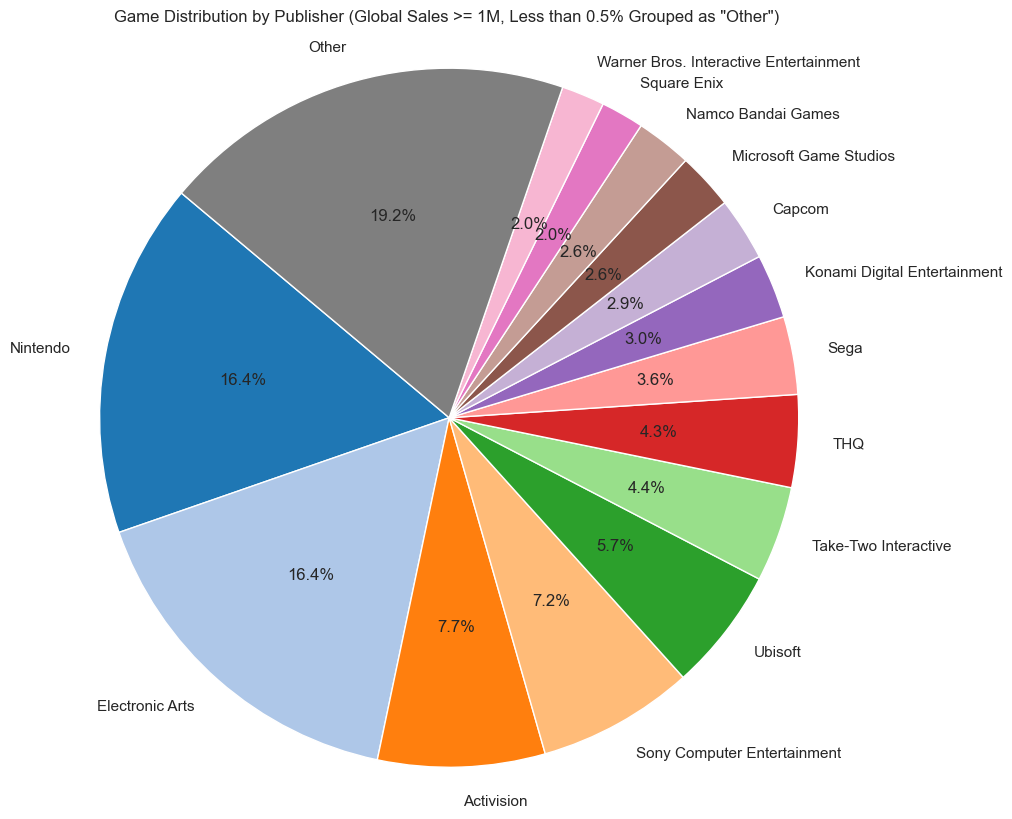

In [49]:
# Filter the data for Global_Sales >= 1.00
filtered_data = data[data['Global_Sales'] >= 1.00]

# Count the number of games by publisher in the filtered dataset
publisher_counts_filtered_1M = filtered_data['Publisher'].value_counts()

# Calculate the total number of games
total_games = publisher_counts_filtered_1M.sum()

# Separate publishers contributing less than 0.5% into an "Other" category
main_publishers = publisher_counts_filtered_1M[publisher_counts_filtered_1M / total_games >= 0.019]
other_count = publisher_counts_filtered_1M[publisher_counts_filtered_1M / total_games < 0.019].sum()

# Add the "Other" category
main_publishers = main_publishers.append(pd.Series({'Other': other_count}))

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    main_publishers.values,
    labels=main_publishers.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("tab20", len(main_publishers))
)
plt.title('Game Distribution by Publisher (Global Sales >= 1M, Less than 0.5% Grouped as "Other")')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.show()


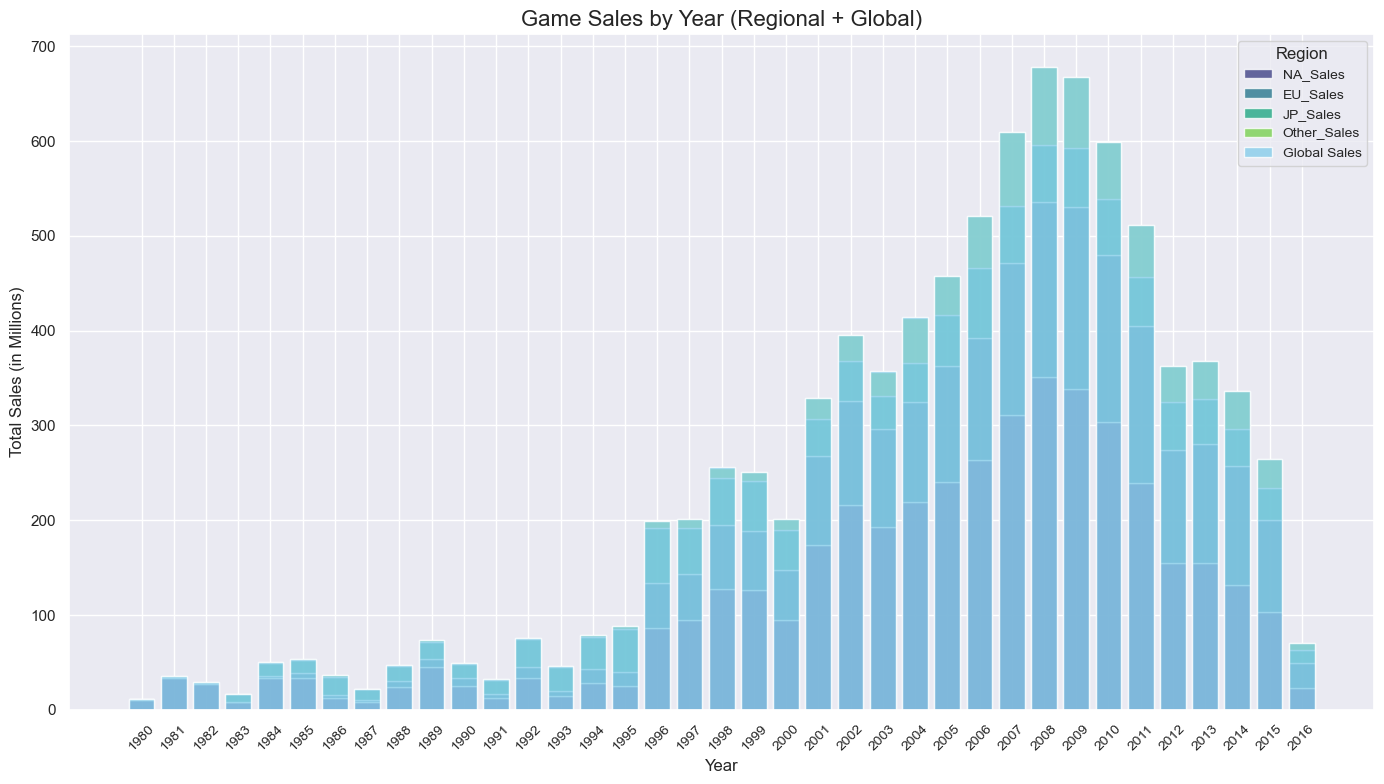

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Year' column is numeric and drop invalid years
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year'])

# Group by year and sum sales for each region and global sales
sales_by_year = data.groupby('Year')[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()

# Create a figure for the combined plot
plt.figure(figsize=(14, 8))

# Define the regions and their colors
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
colors = sns.color_palette("viridis", len(regions))

# Plot each region's sales as stacked bars
bottom = [0] * len(sales_by_year.index)  # Initialize bottom as 0 for stacking

for i, region in enumerate(regions):
    plt.bar(sales_by_year.index, sales_by_year[region], label=region, color=colors[i], bottom=bottom, alpha=0.8)
    bottom = [sum(x) for x in zip(bottom, sales_by_year[region])]  # Update bottom to stack the next region

# Plot the global sales (skyblue)
plt.bar(sales_by_year.index, sales_by_year['Global_Sales'], label="Global Sales", color='skyblue', alpha=0.8)

# Add titles and labels
plt.title("Game Sales by Year (Regional + Global)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (in Millions)", fontsize=12)
plt.xticks(sales_by_year.index, rotation=45, fontsize=10)
plt.legend(title="Region", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


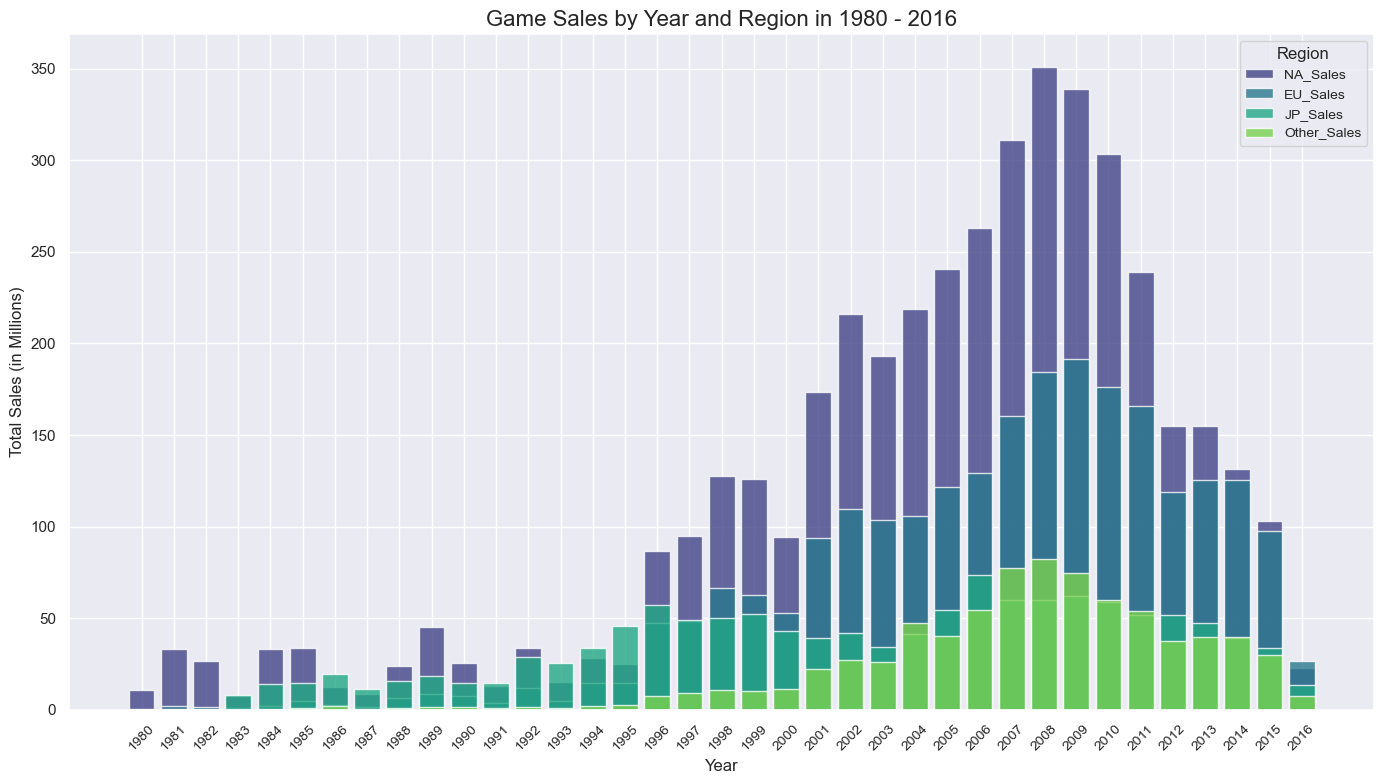

In [100]:

# Ensure the 'Year' column is numeric and drop invalid years
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year'])

# Group by year and sum sales for each region
sales_by_year = data.groupby('Year')[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Plot the sales data
plt.figure(figsize=(14, 8))

# Plot bar charts for each region
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
colors = sns.color_palette("viridis", len(regions))

for i, region in enumerate(regions):
    plt.bar(sales_by_year.index, sales_by_year[region], label=region, color=colors[i], alpha=0.8)

# Add titles and labels
plt.title("Game Sales by Year and Region in 1980 - 2016", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales (in Millions)", fontsize=12)
plt.xticks(sales_by_year.index, rotation=45, fontsize=10)
plt.legend(title="Region", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()




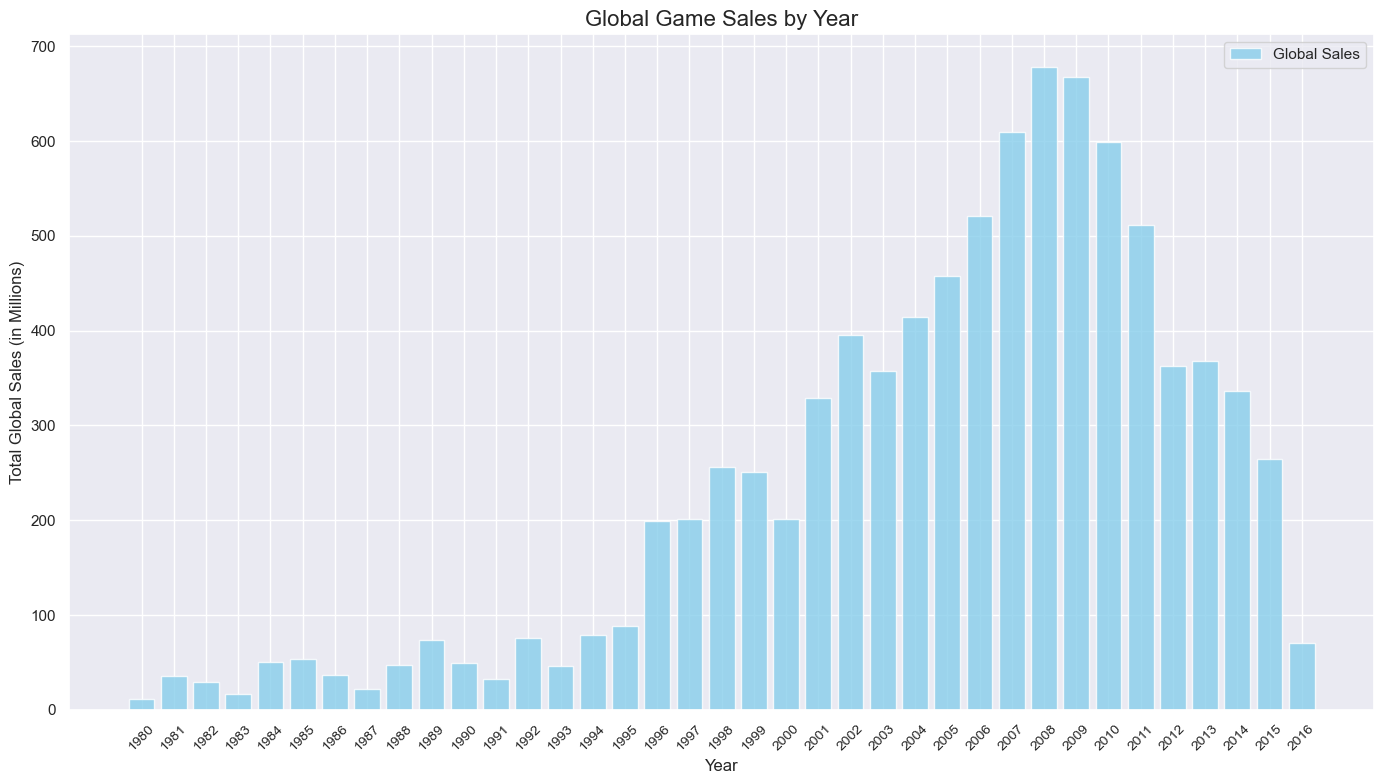

In [98]:
# Ensure the 'Year' column is numeric and drop invalid years
data = data[data['Year'] != 2020]
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year'])

# Group by year and sum Global Sales
sales_by_year = data.groupby('Year')['Global_Sales'].sum()

# Plot the sales data
plt.figure(figsize=(14, 8))

# Create a bar chart for Global Sales
plt.bar(sales_by_year.index, sales_by_year.values, color='skyblue', alpha=0.8, label='Global Sales')

# Add titles and labels
plt.title("Global Game Sales by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Global Sales (in Millions)", fontsize=12)
plt.xticks(sales_by_year.index, rotation=45, fontsize=10)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


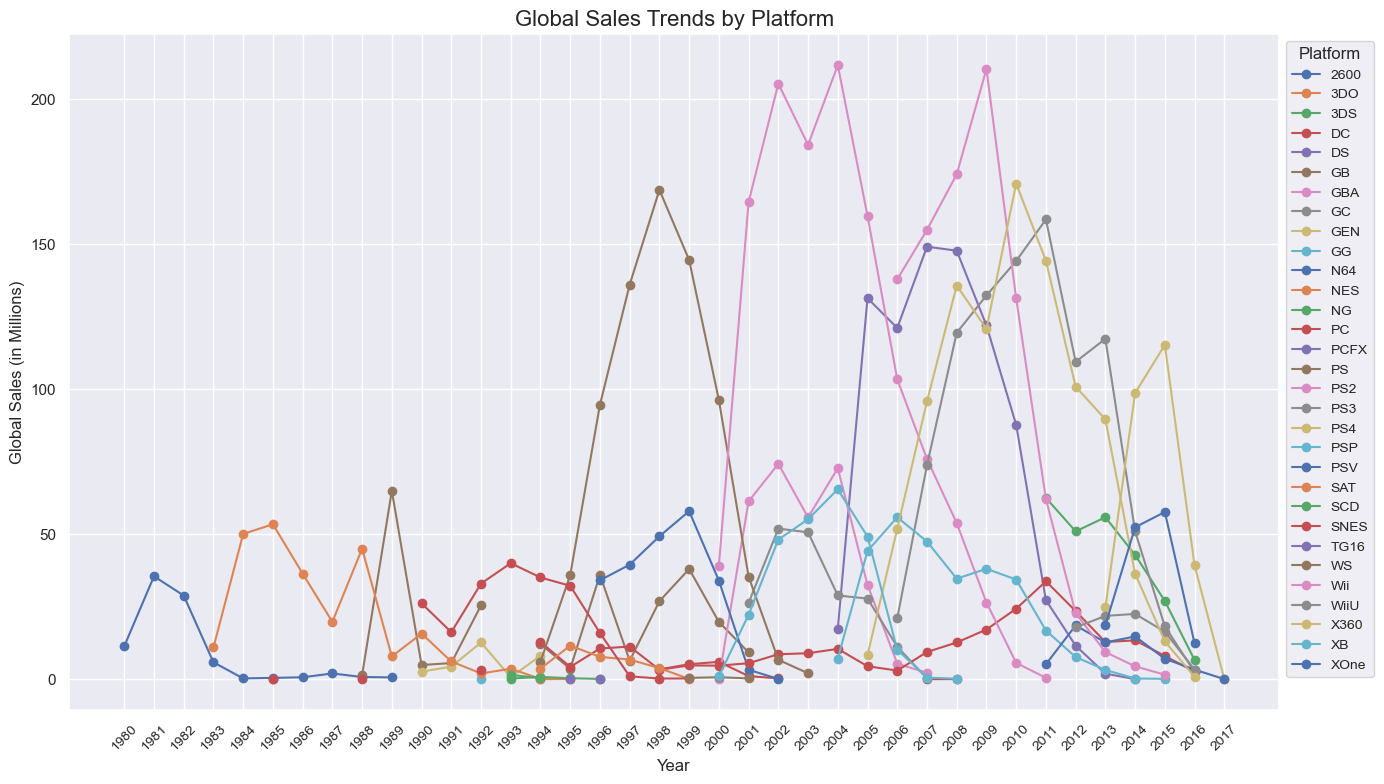

In [52]:
# Ensure the 'Year' column is numeric and drop invalid years
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year', 'Platform'])

# Group by Year and Platform, and sum Global Sales
platform_sales = data.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Pivot the data to make platforms columns
platform_sales_pivot = platform_sales.pivot(index='Year', columns='Platform', values='Global_Sales')

# Plot the line chart
plt.figure(figsize=(14, 8))

# Plot each platform as a line
for platform in platform_sales_pivot.columns:
    plt.plot(platform_sales_pivot.index, platform_sales_pivot[platform], marker='o', label=platform)

# Add titles and labels
plt.title("Global Sales Trends by Platform", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Global Sales (in Millions)", fontsize=12)
plt.xticks(platform_sales_pivot.index, rotation=45, fontsize=10)
plt.legend(title="Platform", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()



In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and preprocess data
data = pd.read_csv('vgsales.csv')

# Drop rows with missing data
data = data.dropna(subset=['Year', 'Publisher'])

# Remove rows where any column contains "Unknown" or "N/A"
data = data[~data.isin(["Unknown", "N/A"]).any(axis=1)]

# Filter out year 2020 if present
data = data[data['Year'] < 2020]

# Features and target variable
X = data[['Genre', 'Platform', 'Publisher', 'Year']]
y = data['Global_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: One-Hot Encode categorical variables and scale numeric ones
categorical_features = ['Genre', 'Platform', 'Publisher']
numeric_features = ['Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ]
)

# Linear Regression pipeline
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Random Forest pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train Linear Regression model
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Train Random Forest model
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate models
print("Linear Regression:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"  R^2 Score: {r2_score(y_test, y_pred_lr):.2f}\n")

print("Random Forest Regression:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"  R^2 Score: {r2_score(y_test, y_pred_rf):.2f}")

Linear Regression:
  MSE: 3.94
  R^2 Score: 0.09

Random Forest Regression:
  MSE: 4.84
  R^2 Score: -0.12


Distribution of Sales Levels:
1    14157
2     1566
3      464
Name: Sales_Level, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4264
           2       0.96      0.96      0.96       441
           3       0.96      0.93      0.95       152

    accuracy                           0.99      4857
   macro avg       0.97      0.97      0.97      4857
weighted avg       0.99      0.99      0.99      4857



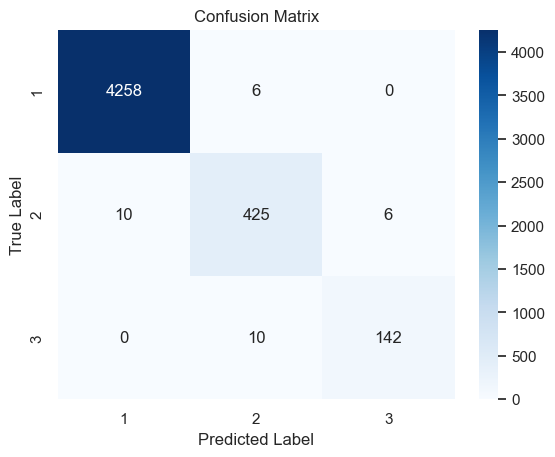

In [82]:
#######################################################################################################
#Supervised Pattern Recognition


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('vgsales.csv')

# Ensure the 'Year' column is numeric and drop invalid years
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year', 'Publisher'])

# Remove rows where any of the columns contain "Unknown" or "N/A"
data = data[~data.isin(["Unknown", "N/A"]).any(axis=1)]

# Remove rows for years 2017-2020
data = data[~data['Year'].isin([2017, 2018, 2019, 2020])]

# Ensure 'Global_Sales' is numeric
data['Global_Sales'] = pd.to_numeric(data['Global_Sales'], errors='coerce')

# Create a new column for sales levels (< 1, 1-15, >15)
data['Sales_Level'] = pd.cut(
    data['Global_Sales'], 
    bins=[-float('inf'), 1, 3, float('inf')],  # Updated bins
    labels=[1, 2, 3],  # 1 = Low, 2 = Medium, 3 = High
    include_lowest=True
)

# Drop rows with missing data
data = data.dropna(subset=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Sales_Level'])

# Prepare features (X) and target (y)
X = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = data['Sales_Level']

# Check distribution of classes
print("Distribution of Sales Levels:")
print(y.value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Added class weighting
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion



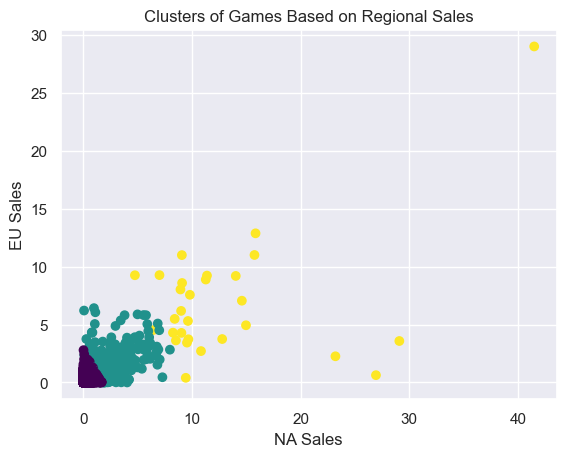

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare features
X = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize Clusters (using first two dimensions for simplicity)
plt.scatter(X['NA_Sales'], X['EU_Sales'], c=data['Cluster'], cmap='viridis')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.title('Clusters of Games Based on Regional Sales')
plt.show()


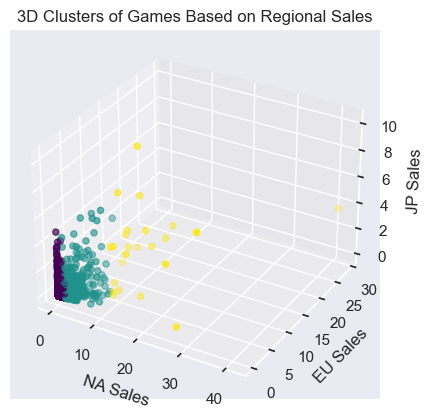

In [87]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Prepare the data (only NA, EU, and JP sales for the 3D plot)
X = data[['NA_Sales', 'EU_Sales', 'JP_Sales']]

# Apply KMeans again
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['NA_Sales'], X['EU_Sales'], X['JP_Sales'], c=data['Cluster'], cmap='viridis')

ax.set_xlabel('NA Sales')
ax.set_ylabel('EU Sales')
ax.set_zlabel('JP Sales')
ax.set_title('3D Clusters of Games Based on Regional Sales')
plt.show()


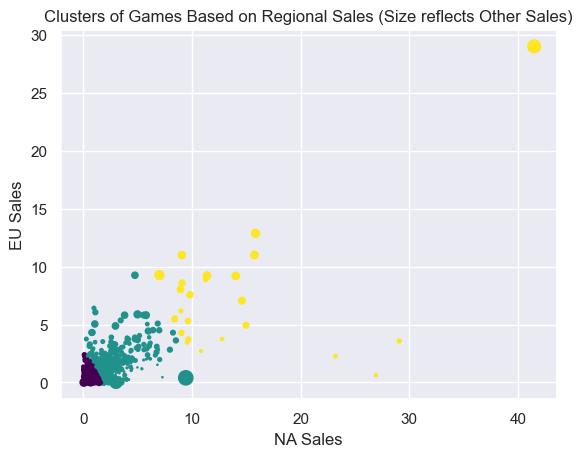

In [84]:
plt.scatter(X['NA_Sales'], X['EU_Sales'], c=data['Cluster'], cmap='viridis', s=data['Other_Sales'] * 10)
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.title('Clusters of Games Based on Regional Sales (Size reflects Other Sales)')
plt.show()


In [85]:
cluster_summary = data.groupby('Cluster')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print(cluster_summary)


          NA_Sales  EU_Sales  JP_Sales  Other_Sales
Cluster                                            
0         0.165047  0.088720  0.059380     0.030555
1         2.356711  1.409149  0.462905     0.441753
2        14.222917  7.418750  3.309583     1.988750


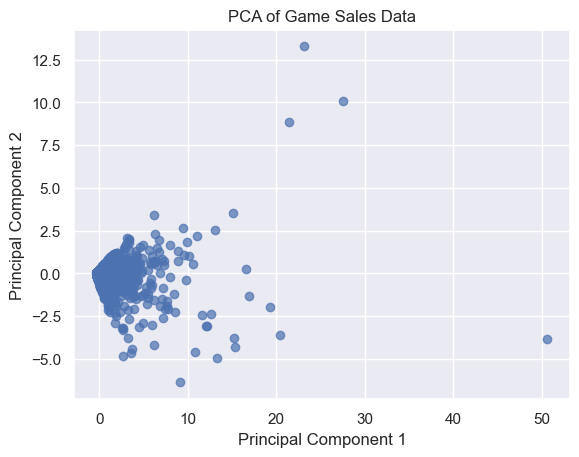

In [73]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
sales_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(sales_pca[:, 0], sales_pca[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Game Sales Data')
plt.show()


In [74]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(random_state=42, contamination=0.01)
data['Anomaly'] = iso_forest.fit_predict(X)

# Highlight anomalies
anomalies = data[data['Anomaly'] == -1]
print("Anomalies:")
print(anomalies)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies:
     Rank                                               Name Platform    Year  \
0       1                                         Wii Sports      Wii  2006.0   
1       2                                  Super Mario Bros.      NES  1985.0   
2       3                                     Mario Kart Wii      Wii  2008.0   
3       4                                  Wii Sports Resort      Wii  2009.0   
4       5                           Pokemon Red/Pokemon Blue       GB  1996.0   
..    ...                                                ...      ...     ...   
249   250          Winning Eleven: Pro Evolution Soccer 2007      PS2  2006.0   
265   266                    Metal Gear Solid 3: Snake Eater      PS2  2004.0   
292   293                      World Soccer Winning Eleven 9      PS2  2005.0   
315   316        World Soccer Winning Eleven 8 International      PS2  2004.0   
402   403  English Training: Have Fun Improving Your Skills!       DS  2006.0   

            Genr